In [20]:
import os
import sys
import random
import time
from random import seed, randint
import argparse
import platform
from datetime import datetime
import imp
import numpy as np
import fileinput
from itertools import product
import pandas as pd
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import seaborn as sns
from os import listdir

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
import matplotlib as mpl
# sys.path.insert(0,'..')
# from notebookFunctions import *
# from .. import notebookFunctions
from Bio.PDB.Polypeptide import one_to_three
from Bio.PDB.Polypeptide import three_to_one
from Bio.PDB.PDBParser import PDBParser
from pyCodeLib import *
from small_script.myFunctions import *
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6.180)    #golden ratio
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
location = "/Users/weilu/Research/server/may_2019/iter0_k1000/optimization/"

In [3]:
with open(location+"cath-dataset-nonredundant-S20Clean.list", "r") as f:
    a = f.readlines()

In [11]:
pre = "/Users/weilu/Research/server/may_2019/iter0_k1000/phis/"
with open(location+"protein_list", "w") as out:
    for line in a:
        protein = line.strip()
        # print(line)
        loc = f"{pre}phi_pairwise_contact_well_{protein}_decoys_shuffle_4.5_6.5_5.0_10"
        loc_native = f"{pre}phi_pairwise_contact_well_{protein}_native_4.5_6.5_5.0_10"
        loc_contact = f"{pre}phi_density_mediated_contact_well_{protein}_decoys_shuffle_6.5_9.5_5.0_10_2.6_7.0"
        loc_contact_native = f"{pre}phi_density_mediated_contact_well_{protein}_native_6.5_9.5_5.0_10_2.6_7.0"
        loc_burial = f"{pre}phi_burial_well_{protein}_decoys_shuffle_4.0"
        loc_burial_native = f"{pre}phi_burial_well_{protein}_native_4.0"
        if not os.path.exists(loc) or not os.path.exists(loc_native)
            or not os.path.exists(loc_contact) or not os.path.exists(loc_contact_native)
            or not os.path.exists(loc_burial) or not os.path.exists(loc_burial_native):
            print(line)
            out.write(line)

2azeA01

2b8tB02

2c0uA01

2ckzB01

2cruA01

2cw9A00

2d7iA02

5u47A04



In [18]:
pre = "/Users/weilu/Research/server/may_2019/iter0_k1000/phis/"
with open(location+"protein_list", "w") as out:
    for line in a:
        protein = line.strip()
        # print(line)
        loc = f"{pre}phi_pairwise_contact_well_{protein}_decoys_shuffle_4.5_6.5_5.0_10"
        loc_native = f"{pre}phi_pairwise_contact_well_{protein}_native_4.5_6.5_5.0_10"
        loc_contact = f"{pre}phi_density_mediated_contact_well_{protein}_decoys_shuffle_6.5_9.5_5.0_10_2.6_7.0"
        loc_contact_native = f"{pre}phi_density_mediated_contact_well_{protein}_native_6.5_9.5_5.0_10_2.6_7.0"
        loc_burial = f"{pre}phi_burial_well_{protein}_decoys_shuffle_4.0"
        loc_burial_native = f"{pre}phi_burial_well_{protein}_native_4.0"
        if not os.path.exists(loc) or not os.path.exists(loc_native) or not os.path.exists(loc_contact) or not os.path.exists(loc_contact_native) or not os.path.exists(loc_burial) or not os.path.exists(loc_burial_native):
            print(line)
            out.write(line)

In [ ]:
pre = "/Users/weilu/Research/server/may_2019/iter0_k1000/phis/"
with open(location+"protein_list", "w") as out:
    for line in a:
        protein = line.strip()
        # print(line)
        loc = f"{pre}phi_pairwise_contact_well_{protein}_decoys_shuffle_4.5_6.5_5.0_10"
        loc_native = f"{pre}phi_pairwise_contact_well_{protein}_native_4.5_6.5_5.0_10"
        loc_contact = f"{pre}phi_density_mediated_contact_well_{protein}_decoys_shuffle_6.5_9.5_5.0_10_2.6_7.0"
        loc_contact_native = f"{pre}phi_density_mediated_contact_well_{protein}_native_6.5_9.5_5.0_10_2.6_7.0"
        loc_burial = f"{pre}phi_burial_well_{protein}_decoys_shuffle_4.0"
        loc_burial_native = f"{pre}phi_burial_well_{protein}_native_4.0"
        if os.path.exists(loc) and os.path.exists(loc_native) and os.path.exists(loc_contact) and os.path.exists(loc_contact_native) and os.path.exists(loc_burial) and  os.path.exists(loc_burial_native):
            print(line)
#             out.write(line)

In [ ]:
phi_density_mediated_contact_well_2azeA01_decoys_shuffle_6.5_9.5_5.0_10_2.6_7.0

In [6]:
loc = f"/Users/weilu/Research/server/may_2019/iter0_k1000/phis/phi_pairwise_contact_well_{protein}_decoys_shuffle_4.5_6.5_5.0_10"
os.path.exists(loc)





True

In [22]:
pre = "/Users/weilu/Research/server/may_2019/iter0_k1000/optimization/gammas/"
name = "cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0phi_burial_well4.0"
A,B,B_filtered,Gamma,Gamma_filtered,Lamb,Lamb_filtered,half_B,other_half_B,std_half_B,A_prime = get_raw_optimization_data(pre, name)


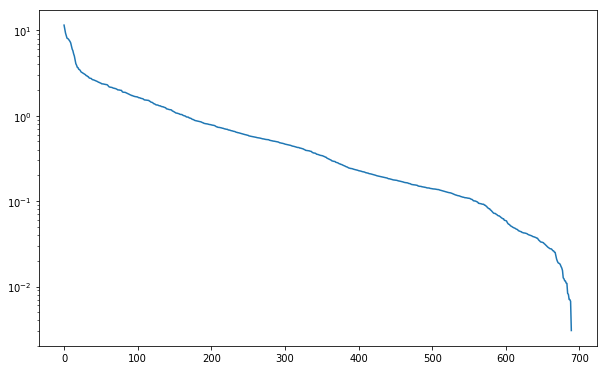

In [24]:
plt.plot(Lamb)
plt.yscale("log")

In [26]:
total_phis = len(A)
num_decoys = 1000

In [27]:
filtered_gamma, filtered_B, filtered_lamb, P, lamb = get_filtered_gamma_B_lamb_P_and_lamb(
            A, B, half_B, other_half_B, std_half_B, total_phis, num_decoys, setCutoff=600)

600


In [29]:
np.savetxt(pre+"cutoff600", filtered_gamma)